# Tesla Stock Data Understanding

In this notebook, I explore and understand the Tesla stock price dataset.
The goal of this step is to understand what kind of data is available before
doing any cleaning, analysis, or modeling.

This helps avoid wrong assumptions and ensures the analysis is realistic
from both a business and machine learning perspective.


## Loading the Raw Dataset

The dataset is loaded directly from the `data/raw` folder.
This file contains the original stock price data without any preprocessing.
Working with raw data helps understand the true structure and quality of the dataset.


In [1]:
import pandas as pd
df = pd.read_csv("../data/raw/tesla_stock_raw.csv")
df.head()


,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [2]:
df.shape

(1692, 7)

## Dataset Size

The dataset contains 1692 rows and 7 columns.
Each row represents one trading day of Tesla stock.
This amount of historical data is enough for basic trend analysis
and building simple predictive models, but it is not very large.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


## Initial Observations

- The dataset contains standard stock market features such as Open, High, Low, Close, Volume, and Adjusted Close.
- All numerical columns are already in numeric format.
- The Date column is currently stored as an object (string), which will need to be converted into datetime format for proper time-based analysis.


## Understanding Dataset Columns

- **Date**: Represents the trading day. This is important for analyzing trends over time.
- **Open**: The price of Tesla stock when the market opened on that day.
- **High**: The highest price reached during the trading day.
- **Low**: The lowest price reached during the trading day.
- **Close**: The price of the stock when the market closed.
- **Adj Close**: The adjusted closing price, which accounts for stock splits and dividends.
- **Volume**: Total number of shares traded during the day, showing market activity.


## Choice of Price Column

For long-term analysis and prediction, I would prefer using the Adjusted Close price.
Adjusted Close accounts for stock splits and dividends, so it reflects the true
historical value of the stock. This makes it more reliable for understanding
actual price movement over time.


## Date Column Preprocessing

Before performing any analysis, the Date column needs to be converted
into datetime format. This ensures that the data is ordered correctly
and allows proper time-based analysis.


In [19]:
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date")
df.head()


,Date,Open,High,Low,Close,Volume,Adj Close
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [20]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

## Missing Values Check

The dataset does not contain any missing values in any column.
This means no imputation or data removal is required at this stage.


In [21]:
df.duplicated().sum()

np.int64(0)

## Duplicate Rows Check

No duplicate rows were found in the dataset.
Each row represents a unique trading day, so no duplicate handling is required.


In [22]:
df.to_csv("../data/processed/tesla_stock_processed.csv", index=False)

In [23]:
df = pd.read_csv("../data/processed/tesla_stock_processed.csv")

df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001


## Long-Term Stock Price Trend

To understand how Tesla stock has behaved over time,
I plotted the Adjusted Close price.
This helps visualize overall growth, volatility,
and major trend changes before any modeling.


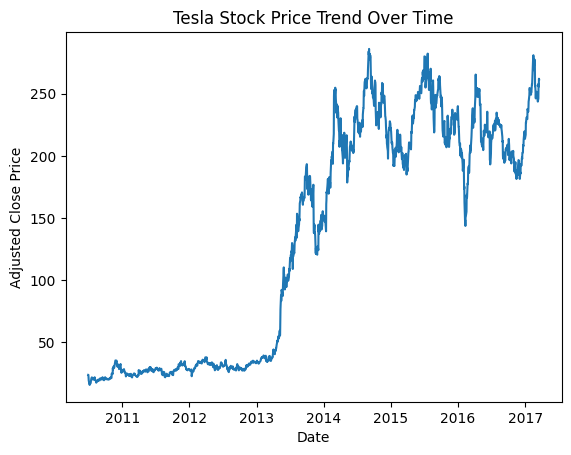

In [31]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
df["Date"] = pd.to_datetime(df["Date"])
plt.figure()
plt.plot(df["Date"], df["Adj Close"])
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.title("Tesla Stock Price Trend Over Time")
plt.show()

## Observations from Price Trend

From the plot, Tesla stock shows a strong long-term upward trend.
In the early years, the price is relatively low and stable.
After that, there is a sharp increase in price, followed by high volatility.
This indicates that while the stock has grown significantly over time,
it also experiences frequent and large price fluctuations.


## Trading Volume Over Time

To understand how actively Tesla stock was traded over time,
I analyzed the trading volume. Volume helps indicate market interest
and supports the interpretation of price movements.


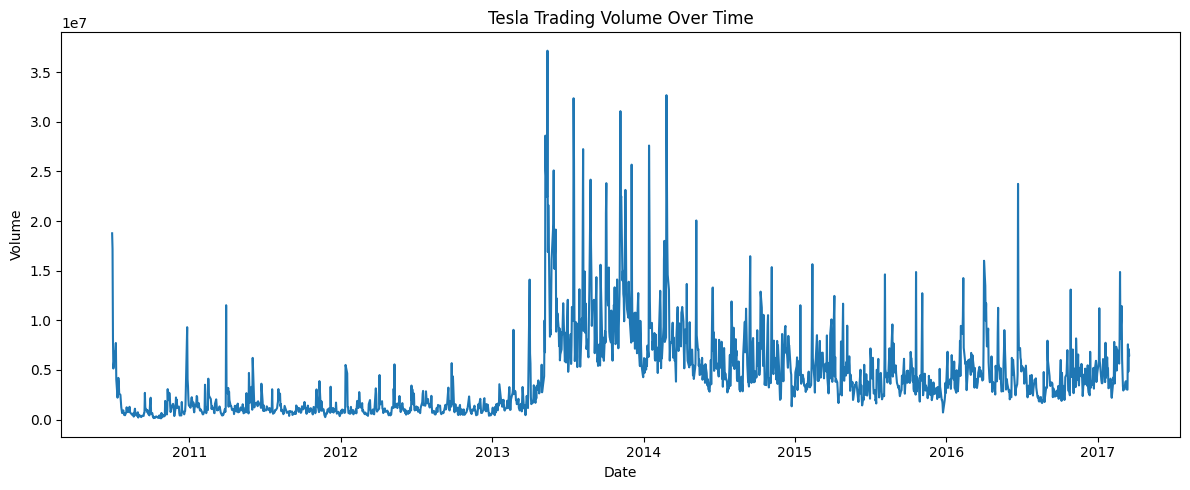

In [29]:
df["Date"] = pd.to_datetime(df["Date"])

plt.figure(figsize=(12,5))
plt.plot(df["Date"], df["Volume"])
plt.title("Tesla Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

plt.tight_layout()
plt.show()

## Tesla Trading Volume Over Time

The graph shows how Tesla’s trading volume has changed over time.  The x-axis represents the date, and the y-axis represents the number of shares traded.

From the plot, it can be seen that trading volume was relatively low during the initial years (around 2010–2012). A sharp increase in volume is observed around 2013–2014, which indicates higher investor participation during that period. After this phase, the volume becomes more stable, although sudden spikes can still be seen on certain days.

These spikes in trading volume may be due to important events such as company announcements, earnings reports, or changes in market sentiment.

Overall, the graph suggests that investor interest in Tesla stock increased over time, especially after the early years.


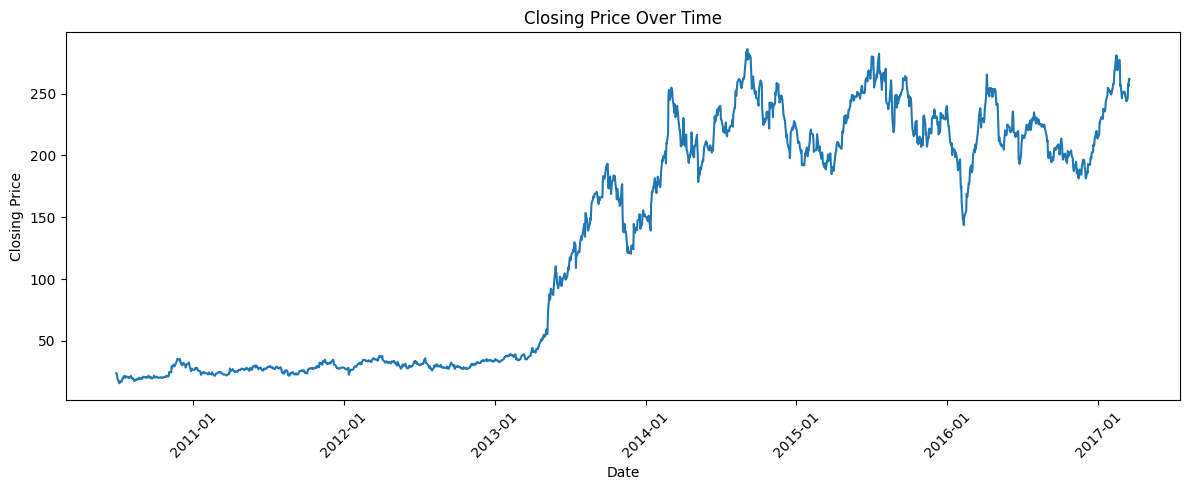

In [32]:
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date")

plt.figure(figsize=(12, 5))
plt.plot(df["Date"], df["Close"])
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Closing Price Over Time")

# fix date axis formatting
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
